In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from google.colab import files


In [7]:
# the start of data time
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2020,1,1)
end = dt.datetime.now()

In [16]:
# import the BTC data
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [27]:
#import data
data = pd.read_csv('BTC-USD.csv', date_parser=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
811,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
812,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
813,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291
814,2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,44348.730469,30574413034
815,2022-03-26,44334.335938,44531.281250,44168.675781,44341.875000,44341.875000,16036337664


In [34]:
#prepare data
x_training = data[data['Date']<'2022-01-01'].copy()
x_training
# set how many days you want to predict
prediction_days = 60

In [33]:
x_testing = data[data['Date']>'2022-01-01'].copy()
x_testing

,Date,Open,High,Low,Close,Adj Close,Volume
732,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
733,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
734,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
735,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
736,2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289
...,...,...,...,...,...,...,...
811,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
812,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
813,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291
814,2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,44348.730469,30574413034


In [31]:
training_data = x_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
1,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
2,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
3,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
4,7410.451660,7544.497070,7400.535645,7411.317383,19725074095


In [32]:
# use MinMaxScaler to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.03505058, 0.03029567, 0.0492647 , 0.03561545, 0.01863826],
       [0.03517303, 0.02963105, 0.04541606, 0.03218546, 0.02524091],
       [0.0316857 , 0.03280734, 0.04509051, 0.03792726, 0.04682067],
       ...,
       [0.68142655, 0.67427352, 0.67594476, 0.66256464, 0.05254154],
       [0.66330797, 0.67049499, 0.67367767, 0.67428126, 0.04261363],
       [0.67416003, 0.67983289, 0.66981803, 0.66035579, 0.07298627]])

In [35]:
X_train, Y_train = [], []
training_data.shape[0]
for i in range(prediction_days, training_data.shape[0]):
  X_train.append(training_data[i-prediction_days:i])
  Y_train.append(training_data[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(671, 60, 5)

In [36]:
# build the model
from pandas._libs.hashtable import mode
# predict the price of cryptocurrency using LSTM neural network
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 50, validation_split=0.1)

Epoch 1/20
13/13 [==============================] - 9s 279ms/step - loss: 0.1108 - val_loss: 0.0421
Epoch 2/20
13/13 [==============================] - 3s 226ms/step - loss: 0.0285 - val_loss: 0.0473
Epoch 3/20
13/13 [==============================] - 3s 224ms/step - loss: 0.0265 - val_loss: 0.0121
Epoch 4/20
13/13 [==============================] - 3s 224ms/step - loss: 0.0205 - val_loss: 0.0082
Epoch 5/20
13/13 [==============================] - 3s 221ms/step - loss: 0.0161 - val_loss: 0.0094
Epoch 6/20
13/13 [==============================] - 3s 220ms/step - loss: 0.0157 - val_loss: 0.0122
Epoch 7/20
13/13 [==============================] - 3s 225ms/step - loss: 0.0124 - val_loss: 0.0063
Epoch 8/20
13/13 [==============================] - 3s 222ms/step - loss: 0.0110 - val_loss: 0.0112
Epoch 9/20
13/13 [==============================] - 3s 225ms/step - loss: 0.0115 - val_loss: 0.0046
Epoch 10/20
13/13 [==============================] - 3s 220ms/step - loss: 0.0121 - val_loss: 0.0076

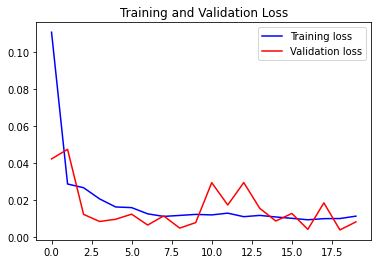

In [39]:
# plot the curve of loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [57]:
# Test Dataset
part_60_days = x_testing.tail(prediction_days)
df = part_60_days.append(x_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,36950.515625,38825.410156,36374.906250,36852.121094,31324598034
1,36841.878906,37148.324219,35629.281250,37138.234375,25041426629
2,37128.445313,37952.878906,36211.109375,37784.332031,22238830523
3,37780.714844,38576.261719,37406.472656,38138.179688,17194183075
4,38151.917969,38266.339844,37437.710938,37917.601563,14643548444


In [58]:
inputs = scaler.transform(df) 
inputs

array([[0.51078162, 0.52780873, 0.51815147, 0.50931869, 0.05630686],
       [0.50904474, 0.50138036, 0.50617839, 0.51388948, 0.03775685],
       [0.51362634, 0.51405894, 0.51552126, 0.52421118, 0.02948266],
       [0.52405479, 0.52388252, 0.53471615, 0.52986405, 0.01458919],
       [0.52998956, 0.51899862, 0.53521777, 0.52634022, 0.00705887],
       [0.52628617, 0.52500138, 0.52391089, 0.53537471, 0.02504206],
       [0.53526314, 0.53237433, 0.54607208, 0.5395307 , 0.02372464],
       [0.53945117, 0.52795382, 0.52550312, 0.51093002, 0.02037873],
       [0.51069031, 0.50147928, 0.51816164, 0.51415095, 0.01871463],
       [0.51395922, 0.57039412, 0.52969257, 0.58358463, 0.05066086],
       [0.58354215, 0.57542706, 0.59303201, 0.58263072, 0.02184798],
       [0.58257713, 0.58572715, 0.5963529 , 0.59814719, 0.01148308],
       [0.59801605, 0.6156853 , 0.60443398, 0.62095776, 0.04838651],
       [0.62116452, 0.62974195, 0.62145009, 0.6254015 , 0.06148761],
       [0.62503441, 0.62082159, 0.

In [95]:
#create the test dataset
X_test = []
Y_test = []
for i in range(prediction_days, inputs.shape[0]):
  X_test.append(inputs[i-prediction_days:i])
  Y_test.append(inputs[i, 0])

In [96]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape
Y_test.shape
Y_pred = model.predict(X_test) 
Y_pred 
Y_test
scaler.scale_

array([1.59879371e-05, 1.57585063e-05, 1.60577871e-05, 1.59754515e-05,
       2.95233159e-12])

In [98]:
scale = 1/1.59879371e-05
Y_test = Y_test*scale
Y_pred = Y_pred*scale
Y_pred

array([[42418.87 ],
       [42664.934],
       [42955.516],
       [43284.242],
       [43631.484],
       [43969.164],
       [44267.777],
       [44503.77 ],
       [44667.406],
       [44756.17 ],
       [44779.227],
       [44755.51 ],
       [44702.875],
       [44633.71 ],
       [44559.54 ],
       [44488.383],
       [44422.434],
       [44359.895],
       [44297.58 ],
       [44231.668],
       [44142.98 ],
       [44002.445],
       [43792.46 ],
       [43509.684],
       [43165.316],
       [42779.758],
       [42371.73 ],
       [41961.582],
       [41570.168],
       [41213.145],
       [40900.81 ],
       [40641.254],
       [40433.598],
       [40268.645],
       [40149.707],
       [40088.176],
       [40093.453],
       [40174.285],
       [40335.586],
       [40573.875],
       [40879.254],
       [41230.016],
       [41600.45 ],
       [41967.21 ],
       [42312.598],
       [42631.773],
       [42925.848],
       [43187.05 ],
       [43399.277],
       [43550.42 ],


In [100]:
Y_test

array([42678.34765989, 42340.96484786, 41456.27344178, 40896.78125373,
       38562.93359751, 38150.99219148, 36558.88672233, 36732.14844135,
       36907.65234736, 36816.92969136, 37739.60156644, 38944.16406655,
       37596.29297243, 38099.32031647, 38169.46094148, 38115.54297247,
       37247.49609739, 37371.46094141, 36741.44922235, 35697.02734725,
       31469.01172187, 30044.78125274, 31273.15625285, 31652.22656588,
       31947.93750291, 31839.3007839 , 32125.86719093, 32778.13672199,
       33149.33984702, 32917.703128  , 33479.18750305, 33741.13672207,
       31942.22656591, 32146.68750293, 36498.90234733, 36438.54297232,
       37404.20312841, 38852.07422254, 39094.12500356, 39345.22265959,
       38568.55078451, 37409.72265941, 37233.98828439, 37154.82031639,
       37583.88672242, 39575.69922261, 38934.49219155, 35549.55469124,
       35023.44531619, 35115.5234412 , 33420.63281605, 32066.19140892,
       33282.70312803, 32275.98828394, 33331.16797204, 34210.50390912,
      

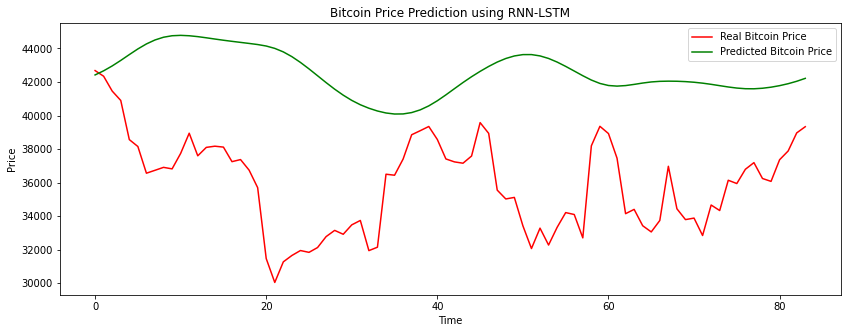

In [99]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()